In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff

cols = []
with open("chronic_kidney_disease.arff", "r") as f:
    for line in f:
        line = line.strip()
        if line.lower().startswith("@attribute"):
            parts = line.split()
            colname = parts[1].strip("'\"") 
            cols.append(colname)
        elif line.lower().startswith("@data"):
            break

df = pd.read_csv(
    "chronic_kidney_disease.arff",
    comment="@",
    header=None,
    names=cols,
    na_values=["?", " "],
    engine="python",
    on_bad_lines="skip"
)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [22]:
filtered_data = df.drop(columns=["rbc", "pc", "pcc", "ba", "sc", "htn", "dm", "cad", "appet", "pe", "ane"])
filtered_data.head()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44,7800,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38,6000,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31,7500,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32,6700,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35,7300,4.6,ckd


In [23]:
filtered_data["hemo"] = filtered_data["hemo"] / 10
filtered_data.head()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44,7800,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,1.13,38,6000,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31,7500,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32,6700,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35,7300,4.6,ckd


In [24]:
filtered_data.replace({"class":"notckd"},{"class":"c"}, inplace=True)
filtered_data.replace({"class":"ckd"}, {"class":"a"}, inplace=True)
filtered_data.head()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44,7800,5.2,a
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,1.13,38,6000,NaN,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31,7500,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32,6700,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35,7300,4.6,a


In [25]:
# print(filtered_data.shape)
filtered_data.dropna(thresh=12, inplace=True)
# print(filtered_data.shape)
filtered_data.head()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44,7800,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32,6700,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35,7300,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,1.22,39,7800,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,1.24,36,NaN,NaN,a


In [26]:
affected = filtered_data[filtered_data['class'] == 'a']
not_affected = filtered_data[filtered_data['class'] == 'c']

In [27]:
affected.describe()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo
count,123.000000,124.000000,125.000000,126.000000,126.000000,120.000000,125.000000,109.000000,109.000000,125.000000
mean,56.902439,80.806452,1.013600,1.857143,0.777778,179.941667,80.444000,133.770642,4.748624,1.061440
std,14.979447,15.803508,0.004561,1.429485,1.337992,93.631703,60.477776,7.642029,4.184221,0.214719
min,4.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,0.310000
25%,49.500000,70.000000,1.010000,1.000000,0.000000,107.000000,37.000000,132.000000,3.800000,0.950000
50%,60.000000,80.000000,1.015000,2.000000,0.000000,156.500000,60.000000,136.000000,4.200000,1.080000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,239.500000,107.000000,139.000000,4.900000,1.200000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,145.000000,47.000000,1.610000


In [28]:
not_affected.describe()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo
count,138.000000,136.000000,138.000000,138.0,138.0,134.000000,134.000000,135.000000,135.000000,136.000000
mean,46.362319,71.323529,1.022500,0.0,0.0,107.388060,32.761194,141.718519,4.341481,1.520000
std,15.774387,8.590160,0.002509,0.0,0.0,18.818049,11.449910,4.806171,0.594174,0.128195
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,1.300000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.250000,138.000000,3.700000,1.410000
50%,46.000000,70.000000,1.022500,0.0,0.0,107.500000,32.500000,141.000000,4.500000,1.500000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.750000,44.000000,146.000000,4.900000,1.620000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,1.780000


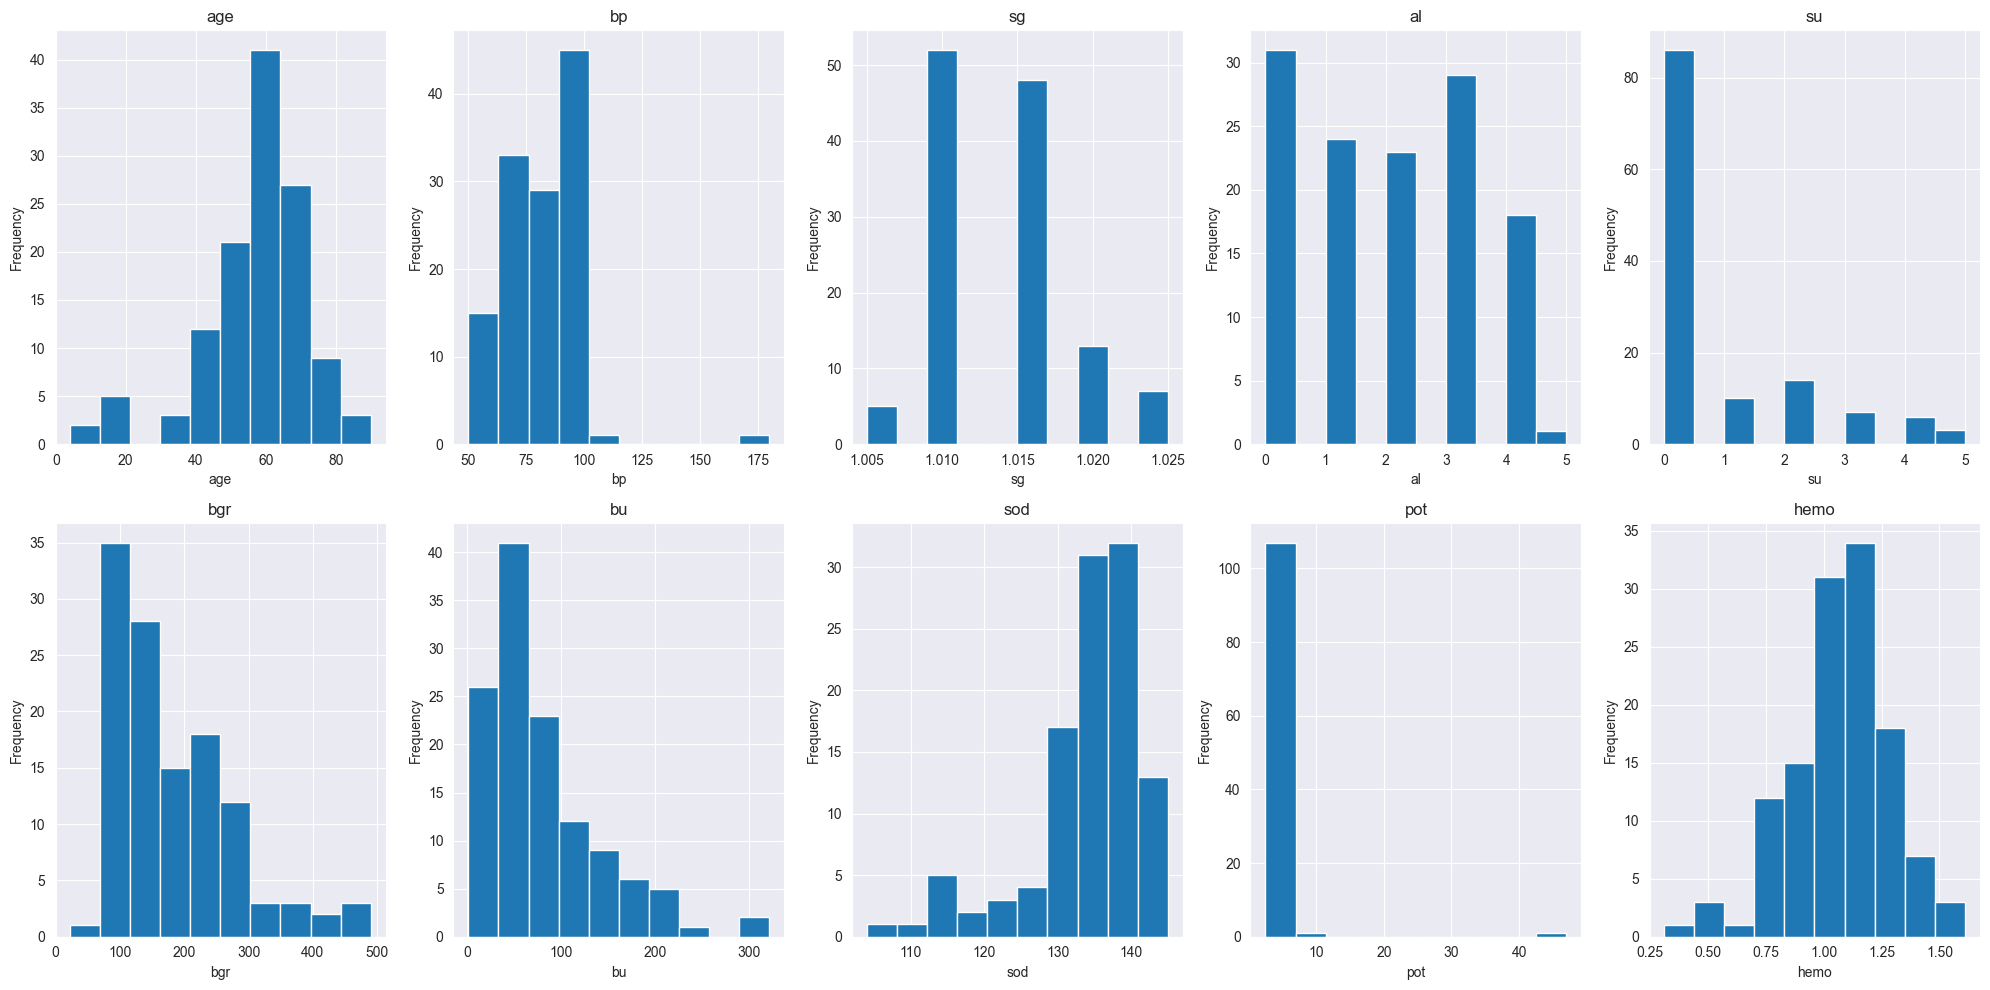

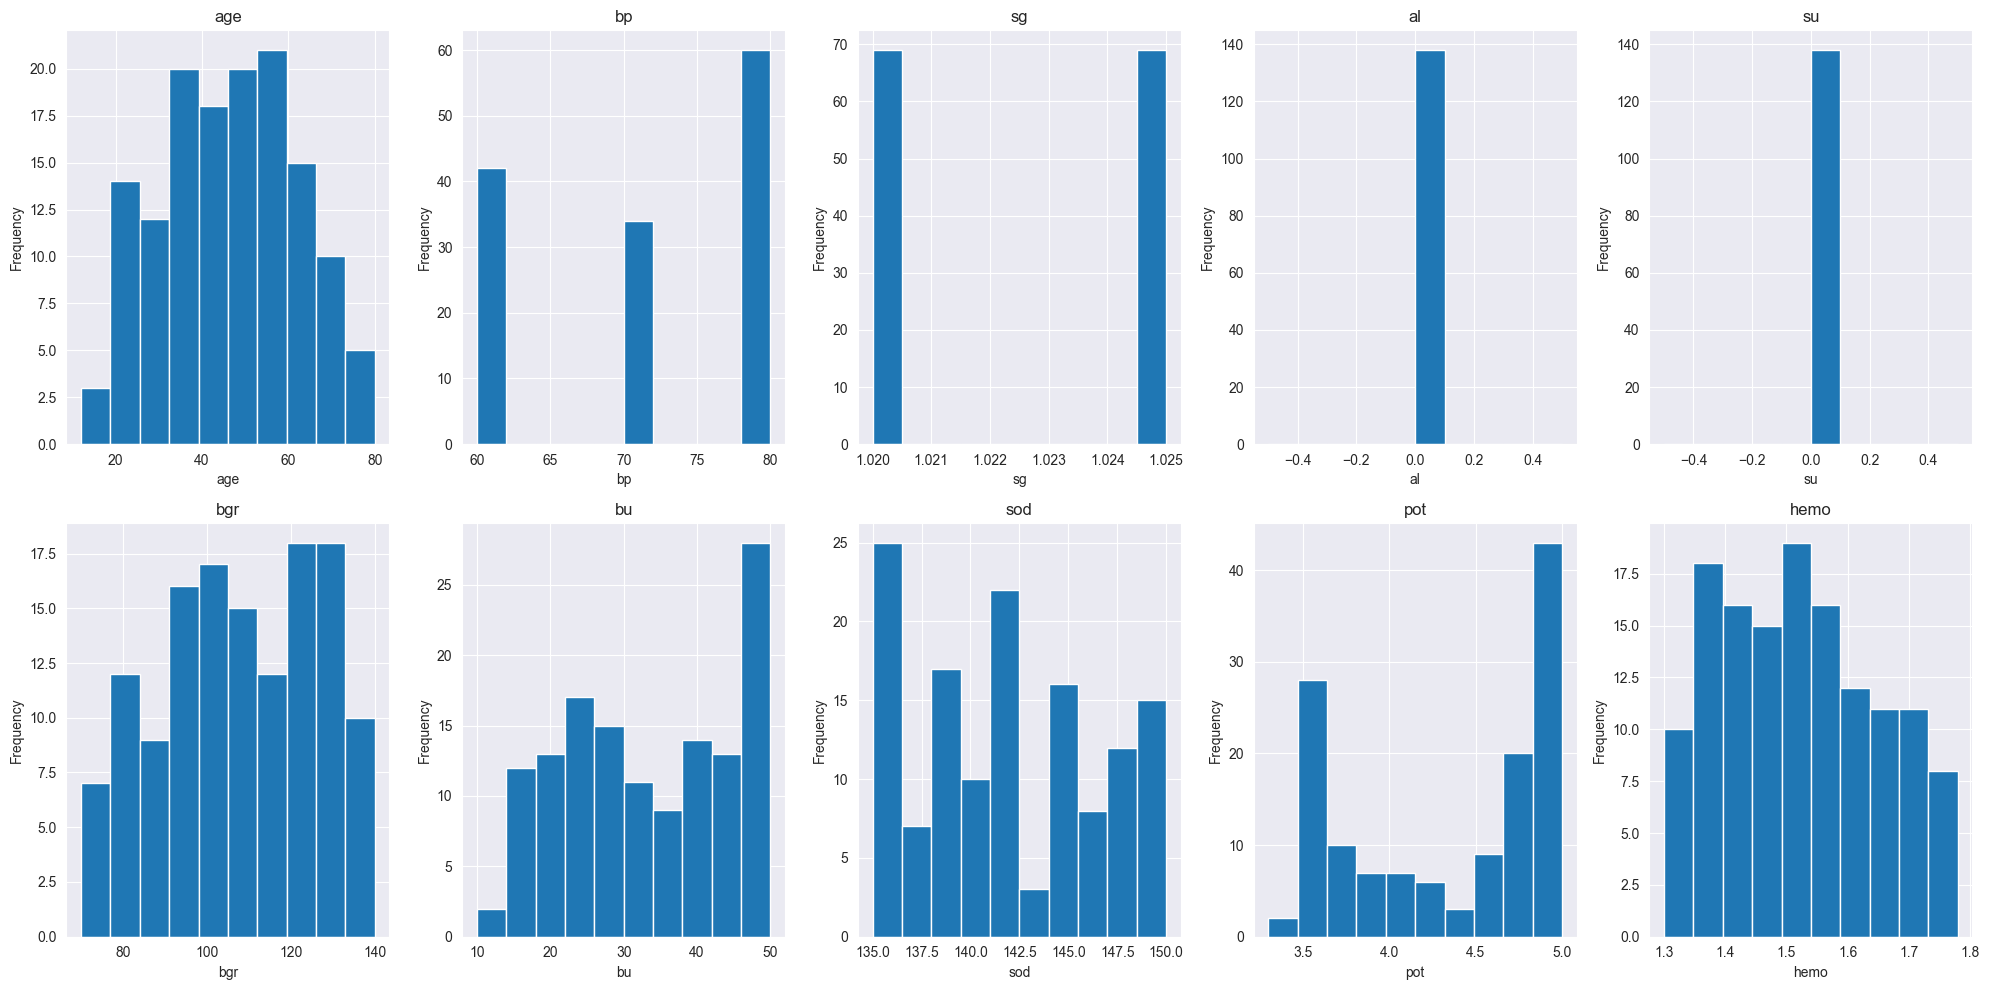

In [29]:
def plot_data(df):
    plt.figure(figsize=(20, 10))

    for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
        plt.subplot(2,5 , i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
    plt.tight_layout()  # automatically adjusts spacing

    plt.show()

plot_data(affected)
plot_data(not_affected)

# Outliers

bp has outliers around 175

pot has outliers around 50

           age        bp        sg        al        su       bgr        bu  \
age   1.000000  0.050168 -0.040396 -0.020866  0.194568  0.237111  0.032358   
bp    0.050168  1.000000  0.068836  0.015155  0.199247  0.045510  0.059308   
sg   -0.040396  0.068836  1.000000 -0.064992 -0.058502 -0.095802 -0.046093   
al   -0.020866  0.015155 -0.064992  1.000000  0.146395  0.111747  0.423543   
su    0.194568  0.199247 -0.058502  0.146395  1.000000  0.696650 -0.030938   
bgr   0.237111  0.045510 -0.095802  0.111747  0.696650  1.000000 -0.015661   
bu    0.032358  0.059308 -0.046093  0.423543 -0.030938 -0.015661  1.000000   
sod  -0.049699  0.148208  0.148932 -0.182187  0.048615 -0.058085 -0.323218   
pot  -0.004200  0.068721  0.044880  0.176985  0.152346  0.020550  0.197803   
hemo  0.015488 -0.085920  0.116962 -0.359316  0.144990  0.128252 -0.607236   

           sod       pot      hemo  
age  -0.049699 -0.004200  0.015488  
bp    0.148208  0.068721 -0.085920  
sg    0.148932  0.044880  0.11

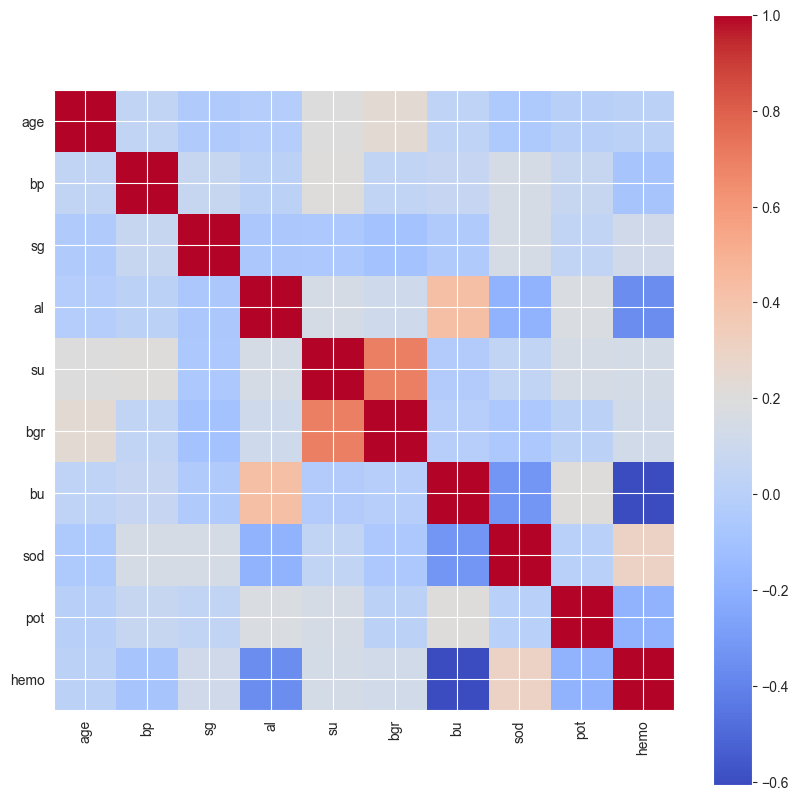

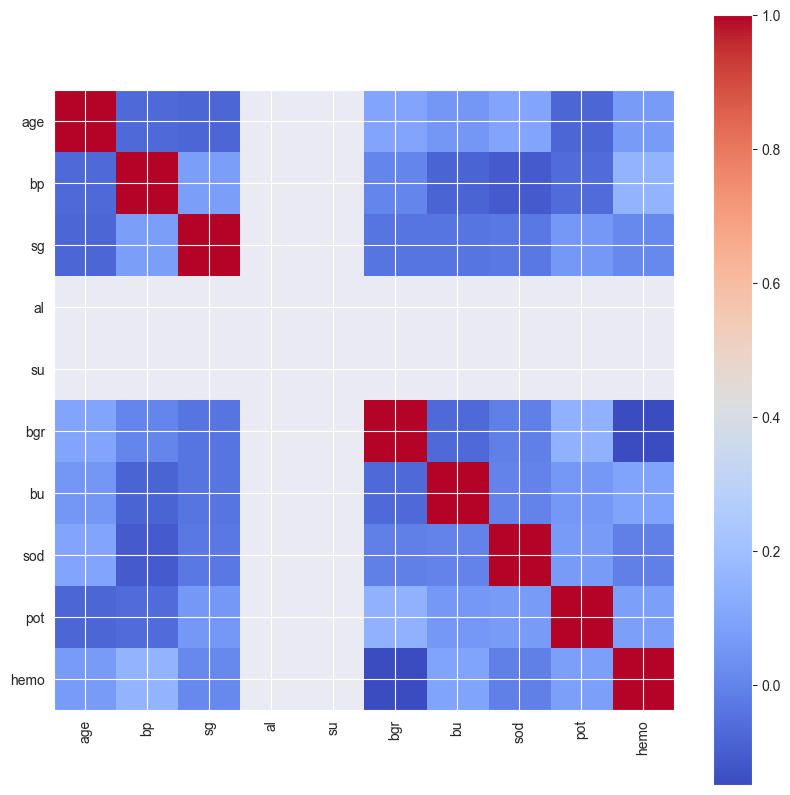

In [30]:
print(affected.select_dtypes(include=['int', 'float']).corr())
print(not_affected.select_dtypes(include=['int', 'float']).corr())

def histo(df):
    corr = df.select_dtypes(include=['int', 'float']).corr()
    
    plt.figure(figsize=(10, 10))
    plt.imshow(corr, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.show()
    
histo(affected)
histo(not_affected)

# Korrelaatiomatriisi paljasti vielä, että al ja su arvot mitattiin vain sairastuneilta.